# Декораторы

### Функции в Python как объекты первого класса:

В языке Python функции являются объектами первого класса, что означает, что они могут быть присвоены переменным, переданы в качестве аргументов другим функциям и возвращены из функций. Это открывает возможности для создания мощных инструментов, таких как декораторы.

In [1]:
f = print

In [3]:
f('hello')

hello


In [4]:
def hello_world():
    print('Hello world!')

Здесь мы определили простую функцию. Из фрагмента кода далее вы увидите, что эта функция, как и классы с числами, является объектом в Python:

In [5]:
print(type(hello_world))

<class 'function'>


In [6]:
print(type(10))

<class 'int'>


In [7]:
class Hello:
    pass

print(type(Hello))

<class 'type'>


Как вы заметили, функция hello_world принадлежит типу <class 'function'>. Это означает, что она является объектом класса function. Кроме того, класс, который мы определили, принадлежит классу type. Type — это метакласс, и все классы наследуют базовый класс object, который имеет тип метакласса type. Поэтому все классы в Python имеют этот тип, включая сам метакласс type.

In [8]:
def hello_world():
    return 'Hello world!'

In [9]:
p = hello_world()
print(type(p))

<class 'str'>


In [10]:
p = hello_world
print(type(p))

<class 'function'>


In [11]:
p()

'Hello world!'

#### Теперь давайте посмотрим на функции в качестве объектов первого класса.

1. Мы можем хранить функции в переменных:

In [14]:
def hello_world():
    print('Hello world!')

hello = hello_world()
hello()

Hello world!


TypeError: 'NoneType' object is not callable

2. Определять функции внутри других функций:

In [15]:
def wrapper_function():
    def hello_world():
        print('Hello world!')
    hello_world()

In [16]:
wrapper_function()

Hello world!


3. Передавать функции в качестве аргументов и возвращать их из других функций:

In [17]:
def higher_order(func):
    print(f'Получена функция {func} в качестве аргумента')
    func()
    return func

higher_order(hello_world)

Получена функция <function hello_world at 0x000002C1C1B114E0> в качестве аргумента
Hello world!


<function __main__.hello_world()>

#### Функции высших порядков

Функции высших порядков — это такие функции, которые могут принимать в качестве аргументов и возвращать другие функции.

*Пример: Функция, принимающая другую функцию как аргумент*

In [18]:
def square(x):
    return x ** 2

def cube(x):
    return x ** 3

def apply_operation(func, numbers):
    return [func(num) for num in numbers]

nums = [1, 2, 3, 4]

print(apply_operation(square, nums))  # [1, 4, 9, 16]
print(apply_operation(cube, nums))    # [1, 8, 27, 64]

[1, 4, 9, 16]
[1, 8, 27, 64]


*Пример: Функция, возвращающая функцию (замыкание)*

In [20]:
def say_name(name):
    def say_goodby():
        print(f"Don't say me goodby {name}!")
        
    say_goodby()

say_name('Sergey')

Don't say me goodby Sergey!


In [21]:
def say_name(name):
    def say_goodby():
        print(f"Don't say me goodby {name}!")
        
    return say_goodby

say_name('Sergey')

<function __main__.say_name.<locals>.say_goodby()>

In [22]:
def say_name(name):
    def say_goodby():
        print(f"Don't say me goodby {name}!")
        
    return say_goodby

f = say_name('Sergey')
f()

Don't say me goodby Sergey!


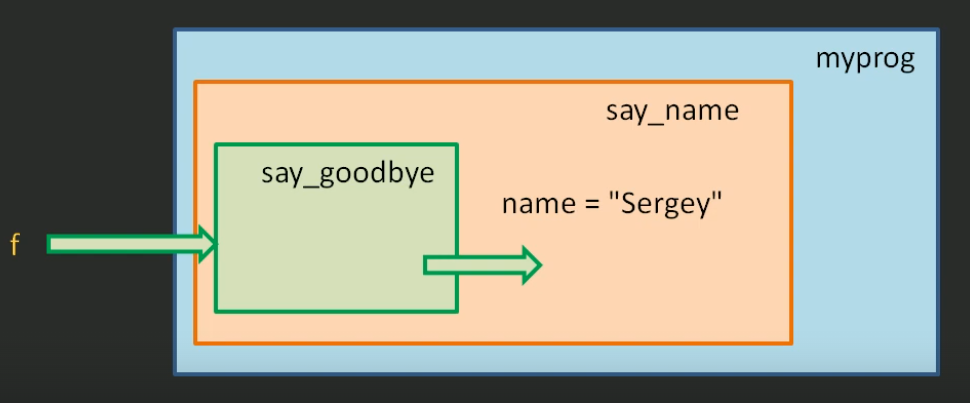

Замыкание (closure) — это функция, которая запоминает переменные из внешней (охватывающей) области видимости, даже если эта область уже завершила работу.

Простыми словами:
Замыкание — это "функция внутри функции", которая имеет доступ к переменным родительской функции, даже после её выполнения.

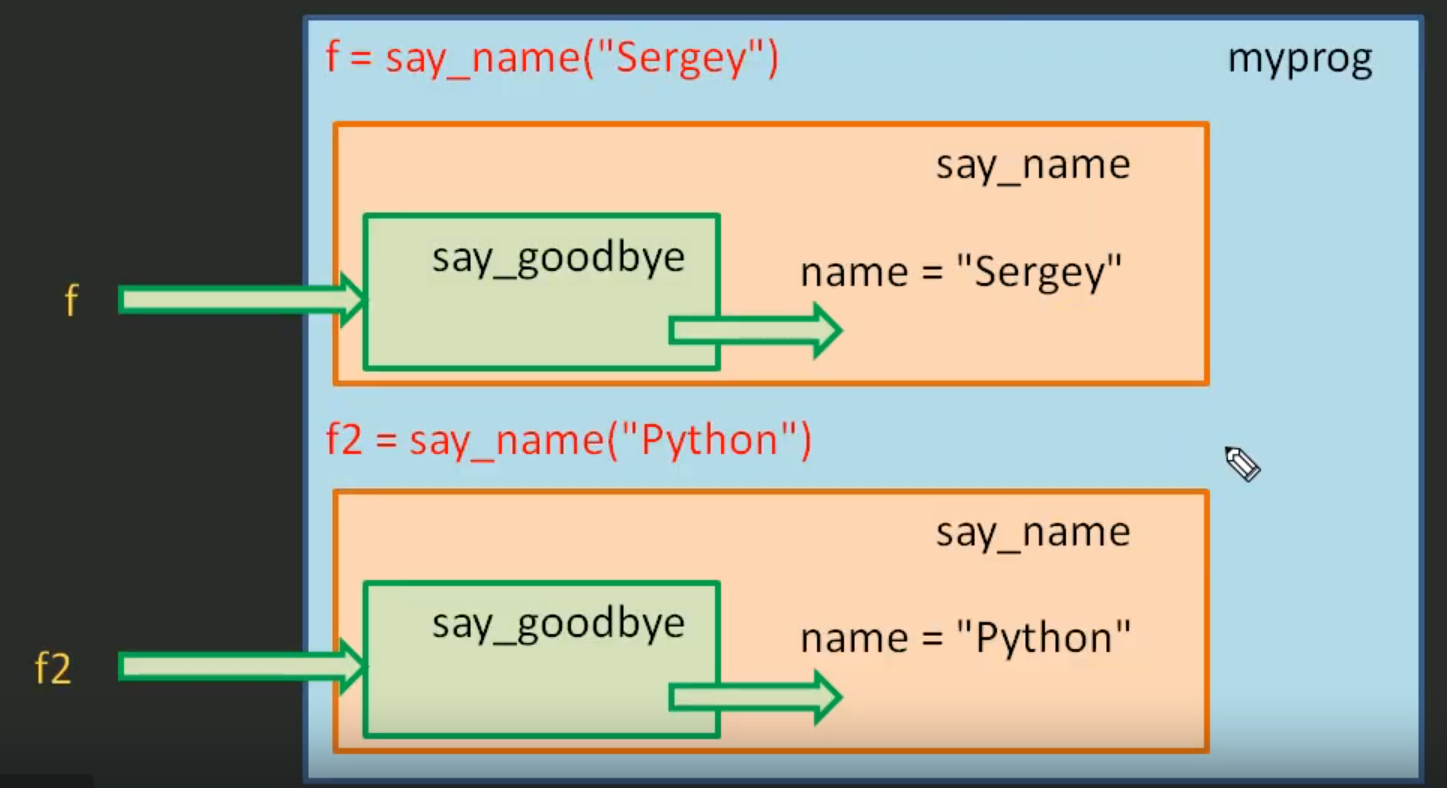

In [23]:
def make_counter():
    count = 0  # Переменная во внешней функции
    
    def counter():  # Вложенная функция (замыкание)
        nonlocal count  # Говорим, что `count` — не локальная переменная
        count += 1
        return count
    
    return counter  # Возвращаем функцию, а не её результат

# Создаём счётчик
my_counter = make_counter()

print(my_counter())  # 1
print(my_counter())  # 2
print(my_counter())  # 3

1
2
3


In [24]:
print(my_counter()) 

4


### Как работают декораторы

Раз мы знаем, как работают функции высших порядков, теперь мы можем понять как работают декораторы.

Декоратор — это функция, которая позволяет обернуть другую функцию для расширения её функциональности без непосредственного изменения её кода.

In [25]:
def decorator_function(func):
    def wrapper():
        print('Функция-обёртка!')
        print('Оборачиваемая функция: {}'.format(func))
        print('Выполняем обёрнутую функцию...')
        func()
        print('Выходим из обёртки')
    return wrapper

In [26]:
f = decorator_function(hello_world)
f()

Функция-обёртка!
Оборачиваемая функция: <function hello_world at 0x000002C1C1B114E0>
Выполняем обёрнутую функцию...
Hello world!
Выходим из обёртки


Здесь decorator_function() является функцией-декоратором. Как вы могли заметить, она является функцией высшего порядка, так как принимает функцию в качестве аргумента, а также возвращает функцию. Внутри decorator_function() мы определили другую функцию, обёртку, так сказать, которая обёртывает функцию-аргумент и затем изменяет её поведение. Декоратор возвращает эту обёртку. Теперь посмотрим на декоратор в действии:

In [27]:
@decorator_function
def hello_world():
    print('Hello world!')

hello_world()

Функция-обёртка!
Оборачиваемая функция: <function hello_world at 0x000002C1C1B127A0>
Выполняем обёрнутую функцию...
Hello world!
Выходим из обёртки


Магия, не иначе! Просто добавив @decorator_function перед определением функции hello_world(), мы модифицировали её поведение. Однако как вы уже могли догадаться, выражение с @ является всего лишь синтаксическим сахаром для hello_world = decorator_function(hello_world).

Иными словами, выражение @decorator_function вызывает decorator_function() с hello_world в качестве аргумента и присваивает имени hello_world возвращаемую функцию.

Еще пример

In [28]:
def my_function():
    a, b=input("Введите два слова: ").split()
    print("Вот они:",b,a)

In [29]:
my_function()

Введите два слова:  hello world


Вот они: world hello


In [30]:
def decorator(func):
    def wrapper():
        print("Сейчас выполним функцию")
        func() # my_function()
        print("Функция выполнена")
    return wrapper

@decorator
def my_function():
    a, b=input("Введите два слова: ").split()
    print("Вот они:",b,a)

my_function() # decorator(my_function)


Сейчас выполним функцию


Введите два слова:  hello world


Вот они: world hello
Функция выполнена


In [31]:
my_function()

Сейчас выполним функцию


Введите два слова:  1 2


Вот они: 2 1
Функция выполнена


И хотя этот декоратор мог вызвать вау-эффект, он не очень полезный. Давайте взглянем на другие, более полезные (наверное):

In [35]:
def benchmark(func):
    import time
    
    def wrapper():
        start = time.time()
        func()
        end = time.time()
        print('[*] Время выполнения: {} секунд.'.format(end-start))
    return wrapper

@benchmark
def fetch_webpage():
    import requests
    webpage = requests.get('https://google.com')

fetch_webpage()

[*] Время выполнения: 0.9491245746612549 секунд.


In [34]:
import requests

requests.get('https://google.com')

<Response [200]>

In [50]:
def benchmark(func):
    import time
    
    def wrapper():
        start = time.time()
        func()
        end = time.time()
        print('[*] Время выполнения: {} секунд.'.format(end-start))
    return wrapper


In [53]:
@benchmark
def calculate():
    s = 0
    for i in range(10**6):
        s += i

In [51]:
f = benchmark(calculate)
f()

[*] Время выполнения: 0.07202506065368652 секунд.


In [54]:
calculate()

[*] Время выполнения: 0.09864258766174316 секунд.


# Виды декараторов

## Декораторы для функций с аргументами

In [56]:
def my_function(between):
    a, b=input("Введите два слова: ").split()
    return a+between+b
    
my_function('-----')

Введите два слова:  hello world


'hello-----world'

In [57]:
def decorator(func):
    def wrapper(*args, **kwargs):
        print("Сейчас выполним функцию")
        result=func(*args, **kwargs)
        print("Функция выполнена, получено: ",result)
        return result.upper()
    return wrapper

@decorator
def my_function(between):
    a, b=input("Введите два слова: ").split()
    return a+between+b

print("Результат работы декоратора: ",my_function(" and "))



Сейчас выполним функцию


Введите два слова:  hello world


Функция выполнена, получено:  hello and world
Результат работы декоратора:  HELLO AND WORLD


In [58]:
my_function('-----')

Сейчас выполним функцию


Введите два слова:  это тест


Функция выполнена, получено:  это-----тест


'ЭТО-----ТЕСТ'

In [59]:
def fetch_webpage(url):
    import requests
    webpage = requests.get(url)
    return webpage.text

fetch_webpage('https://google.com')

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ru"><head><meta content="&#1055;&#1086;&#1080;&#1089;&#1082; &#1080;&#1085;&#1092;&#1086;&#1088;&#1084;&#1072;&#1094;&#1080;&#1080; &#1074; &#1080;&#1085;&#1090;&#1077;&#1088;&#1085;&#1077;&#1090;&#1077;: &#1074;&#1077;&#1073; &#1089;&#1090;&#1088;&#1072;&#1085;&#1080;&#1094;&#1099;, &#1082;&#1072;&#1088;&#1090;&#1080;&#1085;&#1082;&#1080;, &#1074;&#1080;&#1076;&#1077;&#1086; &#1080; &#1084;&#1085;&#1086;&#1075;&#1086;&#1077; &#1076;&#1088;&#1091;&#1075;&#1086;&#1077;." name="description"><meta content="noodp, " name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="hCxvGCtvUnycm7LWFMTukg">(function(){var _g={kEI:\'51DqZ9eLFOSSxc8P2K_WgAg\',kEXPI:\'0,202791,3127516,369956,679,442,538661,48791,30022,6398,9707,344796,219813,27506,41819,4,902,5241738,16,34,62

In [60]:
def benchmark(func):
    import time
    
    def wrapper(*args, **kwargs):
        start = time.time()
        return_value = func(*args, **kwargs)
        end = time.time()
        print('[*] Время выполнения: {} секунд.'.format(end-start))
        return return_value
    return wrapper

@benchmark
def fetch_webpage(url):
    import requests
    webpage = requests.get(url)
    return webpage.text

webpage = fetch_webpage('https://google.com')
print(webpage)

[*] Время выполнения: 1.7933688163757324 секунд.
<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ru"><head><meta content="&#1055;&#1086;&#1080;&#1089;&#1082; &#1080;&#1085;&#1092;&#1086;&#1088;&#1084;&#1072;&#1094;&#1080;&#1080; &#1074; &#1080;&#1085;&#1090;&#1077;&#1088;&#1085;&#1077;&#1090;&#1077;: &#1074;&#1077;&#1073; &#1089;&#1090;&#1088;&#1072;&#1085;&#1080;&#1094;&#1099;, &#1082;&#1072;&#1088;&#1090;&#1080;&#1085;&#1082;&#1080;, &#1074;&#1080;&#1076;&#1077;&#1086; &#1080; &#1084;&#1085;&#1086;&#1075;&#1086;&#1077; &#1076;&#1088;&#1091;&#1075;&#1086;&#1077;." name="description"><meta content="noodp, " name="robots"><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="R-nqYvOm5UomFCpi2CfFkg">(function(){var _g={kEI:'X1HqZ5naHtuUxc8P2IzAmAk',kEXPI:'0,202791,3497481,1112,538661,14111,34680,30022,360901,226411,209

In [65]:
fetch_webpage('https://yandex.ru')

[*] Время выполнения: 1.2927045822143555 секунд.


'<body></body><script nonce=\'0956acad5968f8659a195ff5b2762cc5\'>var it = {"host":"https:\\u002F\\u002Fsso.dzen.ru\\u002Finstall?uuid=5fd5281d-0996-4079-bdc7-162a5c4a5858","retpath":"https:\\u002F\\u002Fdzen.ru\\u002F?yredirect=true&is_autologin_ya=true"};(function() { var form = document.createElement(\'form\'); var element1 = document.createElement(\'input\'); var element2 = document.createElement(\'input\'); element1.name = \'retpath\'; element1.type = \'hidden\'; element1.value = it.retpath; form.appendChild(element1); element2.name = \'container\'; element2.type = \'hidden\'; element2.value = \'1743409656.10153691.bKbxRJ_wF7VfMAk9.Pcx1tl5el0FymhQ3Mzfb_j_HIWOvguOEx5dWu4DOyfgKF_sTzcJyeM8tK8Su-kZhVpCO0bFtfXby0mOLLcw1jF5YqLYPQciaPBdjiYYeIijHHjWhU9TBvoSzvfyLxwaGONp5J3CWei0jO0jQJmT2fuO8OFKXsIGuU47yyzttGnZgJg0BHoTsK2NE-ba4vTxhssQ6UuPHc7SNQkiuC2qMXaaMIFOXeZTBGffvhlgunzMtlDnhtwdXnb4c9g--DcnsAuMzQevi7sReX7fxEBviS7AbSQJDQgyugLLXjzVuVRUZxlllE_SSmgjELrN40gVpJ7whQRySumYHuk1zFpDeebhMT-8qhQFNUn4k

## Параметрические декараторы

In [67]:
def ask_age():
    age=input("Сколько вам лет? ")
    if age.isdigit():
        return age
    return "неизвестно"

ask_age()

Сколько вам лет?  много


'неизвестно'

In [68]:
def param_decorator(ask_name): #ask_name = True
    def decorator(func):
        def wrapper():
            if ask_name:
                name=input("Как вас зовут? ")
            result = func()
            if ask_name:
                print(f"Ваше имя {name}, ваш возраст - {result}")
            else:
                print(f"Ваш возраст - {result}")
        return wrapper
    return decorator

@param_decorator(False, )
def ask_age():
    age=input("Сколько вам лет? ")
    if age.isdigit():
        return age
    return "неизвестно"

ask_age()



Сколько вам лет?  23


Ваш возраст - 23


In [ ]:
def benchmark(iters):
    def actual_decorator(func):
        import time
        
        def wrapper(*args, **kwargs):
            total = 0
            for i in range(iters):
                start = time.time()
                return_value = func(*args, **kwargs)
                end = time.time()
                total = total + (end-start)
            print('[*] Среднее время выполнения: {} секунд.'.format(total/iters))
            return return_value

        return wrapper
    return actual_decorator


@benchmark(iters=10)
def fetch_webpage(url):
    import requests
    webpage = requests.get(url)
    return webpage.text

webpage = fetch_webpage('https://google.com')
print(webpage)

Функция benchmark() на первый взгляд может показаться декоратором, но на самом деле таковым не является. Это обычная функция, которая принимает аргумент iters, а затем возвращает декоратор. В свою очередь, он декорирует функцию fetch_webpage(). Поэтому мы использовали не выражение @benchmark, а @benchmark(iters=10) — это означает, что тут вызывается функция benchmark() (функция со скобками после неё обозначает вызов функции), после чего она возвращает сам декоратор.

***Декоратор принимает функцию в качестве аргумента и возвращает функцию.***

В нашем примере benchmark() не удовлетворяет этому условию, так как она не принимает функцию в качестве аргумента. В то время как функция actual_decorator(), которая возвращается benchmark(), является декоратором.

## Декоратор @functools.wraps

In [ ]:
def log_decorator(func):
    def wrapper():
        print(f'Вызов функции: {func.__name__}')
        func()
    return wrapper
 
@log_decorator
def hello_world():
    print("Hello, world!")
 
hello_world()

В этом примере hello_world обернута log_decorator, который печатает имя функции перед ее вызовом. Однако, это ведет к некоторым проблемам. Если вы попробуете получить имя функции hello_world после того, как она была декорирована, вы получите имя функции обертки, а не исходное имя функции.

In [ ]:
print(hello_world.__name__)

Здесь вместо ожидаемого hello_world выводится wrapper. Это происходит потому, что hello_world теперь ссылается на функцию wrapper внутри log_decorator.

Вот здесь на помощь приходит functools.wraps. Это функция в Python, которая используется внутри декоратора перед внутренней обертывающей функцией. Она обновляет обертку для функции, чтобы она включала в себя имя декорируемой функции и ее документацию.

In [ ]:
from functools import wraps
 
def log_decorator(func):
    @wraps(func)
    def wrapper():
        print(f'Вызов функции: {func.__name__}')
        func()
    return wrapper
 
@log_decorator
def hello_world():
    print("Hello, world!")
 
print(hello_world.__name__)


### Использование несколько декораторов

В Python декораторы можно применять к функциям для добавления дополнительной функциональности. Можно использовать несколько декораторов сразу, и они будут применяться снизу вверх (то есть порядок выполнения — сверху вниз).

🔹 Пример 1: Логирование + Замер времени
Допустим, у нас есть два декоратора:

@log — записывает вызов функции в лог.

@timer — замеряет время выполнения.

python


In [ ]:
import time
from functools import wraps

# Декоратор для логирования
def log(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        print(f"Вызов функции {func.__name__} с аргументами {args}, {kwargs}")
        return func(*args, **kwargs)
    return wrapper

# Декоратор для замера времени
def timer(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        end = time.time()
        print(f"Функция {func.__name__} выполнилась за {end - start:.4f} сек.")
        return result
    return wrapper

# Применяем оба декоратора
@log
@timer
def calculate_sum(a, b):
    time.sleep(1)  # Имитация долгой работы
    return a + b

print(calculate_sum(5, 3))

👉 Порядок выполнения: Сначала @timer замеряет время, затем @log выводит информацию о вызове.

### Применение декоратора к классам

Декораторы также могут быть применены к классам. В этом случае они могут изменять поведение методов класса или добавлять новые методы и атрибуты. Рассмотрим пример

In [ ]:
def add_method(cls):
    def new_method(self):
        return f"Это новый метод в классе {self.__class__.__name__}"
    
    cls.new_method = new_method
    return cls

@add_method
class MyClass:
    def __init__(self, value):
        self.value = value

    def display_value(self):
        return f"Значение: {self.value}"


# Создание экземпляра класса
obj = MyClass(10)

# Вызов существующего метода
print(obj.display_value())  # Выведет: Значение: 10

# Вызов нового метода, добавленного декоратором
print(obj.new_method())  # Выведет: Это новый метод в классе MyClass



В этом примере:

Декоратор add_method принимает класс cls в качестве аргумента.
Внутри декоратора определяется новый метод new_method, который добавляется к классу.
Декоратор возвращает измененный класс.
Класс MyClass декорируется с помощью @add_method, что добавляет новый метод new_method к классу.
Создается экземпляр класса MyClass, и вызываются как существующий метод display_value, так и новый метод new_method.
Этот пример демонстрирует, как декораторы могут быть использованы для изменения поведения классов или добавления новых методов и атрибутов. 

### Практика

Создать декоратор, который замеряет время работы функции.
Предусмотреть различное число итераций для сглаживания показателя.


In [ ]:
import time

def timeit(iterations=1):
    def decorator(func):
        def wrapper(*args, **kwargs):
            total_time = 0
            for _ in range(iterations):
                start_time = time.perf_counter()
                result = func(*args, **kwargs)
                end_time = time.perf_counter()
                total_time += end_time - start_time
            average_time = total_time / iterations
            print(f"Среднее время выполнения функции {func.__name__} за {iterations} итераций: {average_time:.4f} секунд")
            return result
        return wrapper
    return decorator

# Пример использования декоратора
@timeit(iterations=5)
def example_function(n):
    total = 0
    for i in range(n):
        total += i
    return total

# Вызов функции
example_function(10000)



### ДЗ

In [ ]:
#Напишите декоратор validate_args, который будет проверять типы аргументов функции и выводить сообщение об ошибке, если переданы аргументы неправильного типа. Декоратор должен принимать ожидаемые типы аргументов в качестве параметров.

#Пример использования:

@validate_args(int, str)
def greet(age, name):
    print(f"Привет, {name}! Тебе {age} лет.")
greet(25, "Анна")  # Все аргументы имеют правильные типы
greet("25", "Анна")  # Возникнет исключение TypeError


In [ ]:
def validate_args(*expected_types):
    def decorator(func):
        def wrapper(*args, **kwargs):
            if len(args) != len(expected_types):
                raise TypeError(f"Ожидалось {len(expected_types)} аргументов, но получено {len(args)}.")
            for arg, expected_type in zip(args, expected_types):
                if not isinstance(arg, expected_type):
                    raise TypeError(f"Аргумент {arg} должен быть типа {expected_type.__name__}, но получен {type(arg).__name__}.")
            return func(*args, **kwargs)
        return wrapper
    return decorator

# Пример использования декоратора
@validate_args(int, str)
def greet(age, name):
    print(f"Привет, {name}! Тебе {age} лет.")

# Вызов функции с правильными типами аргументов
greet(25, "Анна")

# Вызов функции с неправильным типом аргумента
try:
    greet("25", "Анна")
except TypeError as e:
    print(e)


In [ ]:
#Напишите декоратор log_args, который будет записывать аргументы и результаты вызовов функции в лог-файл. Каждый вызов функции должен быть записан на новой строке в формате "Аргументы: <аргументы>, Результат: <результат>". Используйте модуль logging для записи в лог-файл.

#Пример использования:

python
@log_args
def add(a, b):
    return a + b
add(2, 3)
add(5, 7)


По логированию можно подробнее почитать здесь https://tproger.ru/articles/shpargalka-po-logirovaniju-na-python https://habr.com/ru/companies/wunderfund/articles/683880/

In [ ]:
import logging

def log_args(func):
    # Настройка логирования
    logging.basicConfig(filename='function_calls.log', level=logging.INFO, format='%(asctime)s - %(message)s')

    def wrapper(*args, **kwargs):
        result = func(*args, **kwargs)
        logging.info(f"Аргументы: {args}, {kwargs}, Результат: {result}")
        return result

    return wrapper

# Пример использования декоратора
@log_args
def add(a, b):
    return a + b

# Вызов функции
add(2, 3)
add(5, 7)


### Полезные материалы
1. Декораторы https://pythonworld.ru/osnovy/dekoratory.html 
2. Декораторы в Python: понять и полюбить  https://tproger.ru/translations/demystifying-decorators-in-python/ 
3. https://rutube.ru/video/4712b2619b2ffef87ebae21e4262c873/?utm_source=embed&utm_medium=referral&utm_campaign=main_logo&utm_content=4712b2619b2ffef87ebae21e4262c873&utm_term=yandex-video.naydex.net&referrer=appmetrica_tracking_id%3D1037877625579705379%26ym_tracking_id%3D13484614459417247140&utm_referrer=https%3A%2F%2Frutube.ru%2F

### Вопросы для закрепления
1. Что такое декоратор и зачем он нужен?
2. В каком случае может понадобиться параметрический декоратор?
3. Какую проблему решает functools.wraps и почему эта проблема возникает?
